In [1]:
from scipy.stats import binom
import matplotlib.pyplot as plt
import numpy as np

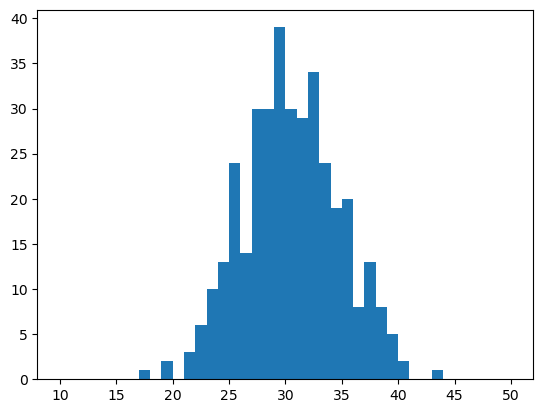

In [2]:
data =  binom.rvs(n = 100, p = 0.3, size = 365)
# 100의 고객이 오고, 30%의 구매율, 365일 시뮬레이션
plt.hist(data, bins = 40, range = [10,50]);

In [3]:
binom.pmf(k = 30, n = 100, p = 0.3)
# 구매율이 30%, 100명 방문, 그 중 딱 30명이 구매할 확률

0.08678386475342813

In [4]:
binom.cdf(k = 30, n = 100, p = 0.3)
# 구매율이 30%, 100명 방문, 그 중 30명 이하의 인원이 구매할 확률

0.5491236007687914

In [5]:
0.5491236007687914 * 365

200.43011428060888

In [6]:
from scipy.stats import norm

In [7]:
m = 100*0.3
s = np.sqrt(100 * 0.3 * 0.7)
data = norm.rvs(loc = m, scale = s,  size = 365)

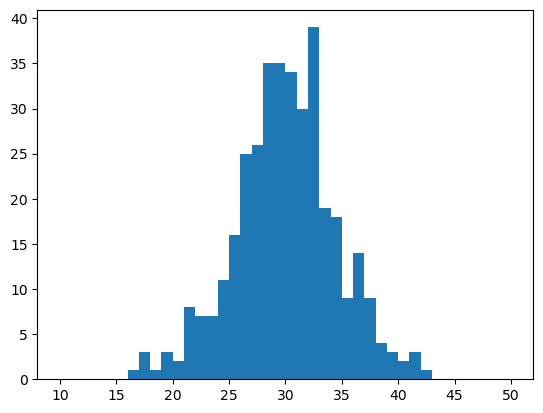

In [8]:
plt.hist(data, bins = 40, range = [10,50]);

In [9]:
import pandas as pd
df = pd.read_excel('data/car.xlsx')

In [10]:
df.head()
# 중고차 가격 데이터
# mileage: 주행거리(Km)
# model: 모델(K3, 아반떼)
# price: 가격(만원)
# year: 연식
# my_car_damage: 내 차 피해액(원)
# other_car_damage: 다른 차 피해액(원)

,mileage,model,price,year,my_car_damage,other_car_damage
0,63608,K3,970,2017,0,564596
1,69336,K3,1130,2015,1839700,1140150
2,36000,K3,1380,2016,446520,2244910
3,19029,K3,1390,2017,889000,4196110
4,97090,K3,760,2015,2339137,2029570


In [11]:
df.price.mean() # 가격의 평균

853.6605839416059

In [12]:
df.price.median() # 가격의 중간값

805.0

In [13]:
df.price.median() == df['price'].median()

True

In [14]:
df.model.value_counts()

Avante    205
K3         69
Name: model, dtype: int64

In [15]:
## 실습
print('마일리지   ','평균:',round(df['mileage'].mean(),2),' / ', '중앙값:',df['mileage'].median() )
print('내 차 데미지   ','평균:',round(df['my_car_damage'].mean(),2),' / ', '중앙값:', df['my_car_damage'].median())
print('다른 차 데미지   ','평균:',round(df['other_car_damage'].mean(),2),' / ', '중앙값:', df['other_car_damage'].median())

마일리지    평균: 77483.22  /  중앙값: 71649.0
내 차 데미지    평균: 2319452.67  /  중앙값: 1100410.0
다른 차 데미지    평균: 1807992.34  /  중앙값: 398619.0


In [16]:
df.mileage.mean() # 주행거리 평균
df['mileage'].median() # 주행거리 중간값
df.describe()  # 한 번에 기술통계 구하기

,mileage,price,year,my_car_damage,other_car_damage
count,274.000000,274.000000,274.000000,2.740000e+02,2.740000e+02
mean,77483.222628,853.660584,2013.273723,2.319453e+06,1.807992e+06
std,43015.794453,332.613127,2.589406,3.080107e+06,4.655390e+06
min,2287.000000,190.000000,2006.000000,0.000000e+00,0.000000e+00
25%,47597.500000,620.000000,2011.000000,0.000000e+00,0.000000e+00
50%,71649.000000,805.000000,2014.000000,1.100410e+06,3.986190e+05
75%,103193.750000,1090.000000,2015.000000,3.002840e+06,1.640666e+06
max,310000.000000,1820.000000,2018.000000,1.536732e+07,5.510890e+07


In [17]:
df.price.quantile(.5)

805.0

In [18]:
df.price.median()

805.0

In [19]:
# mileage가 많은 걸로 상위 10%에 들어가려면 얼마 이상이 되어야 할까?
round(df['mileage'].quantile(.9),2)

129097.0

In [20]:
df.price.min(), df.price.max() # (일상적인 의미에서) 범위

(190, 1820)

In [21]:
df.price.max() - df.price.min() # (통계적인 의미에서) 범위

1630

In [22]:
df.price.quantile(.75) - df.price.quantile(.25) # 사분위간 범위(IQR)

470.0

<AxesSubplot:xlabel='price'>

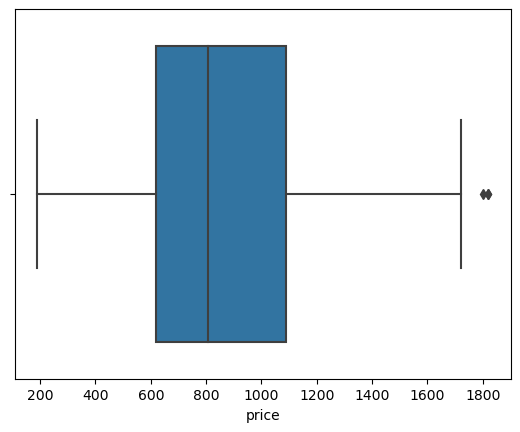

In [23]:
import seaborn as sns
sns.boxplot(data = df, x = 'price')

<AxesSubplot:xlabel='price', ylabel='model'>

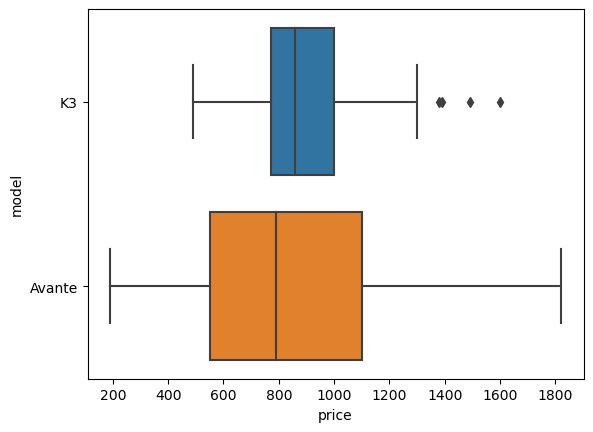

In [24]:
sns.boxplot(data = df, x = 'price', y = 'model')

<AxesSubplot:xlabel='mileage', ylabel='model'>

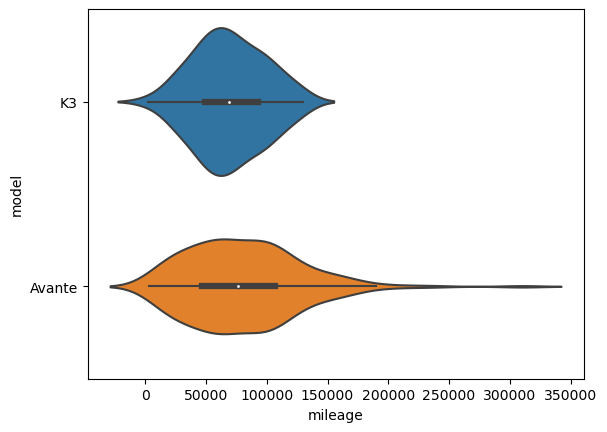

In [25]:
sns.violinplot(data = df,  x = 'mileage',  y = 'model')

In [26]:
df.price.var() # 분산

110631.49243335734

In [27]:
df.price.std() # 표준 편차

332.6131272715455

In [28]:
print('mileage의 분산 : ', df['mileage'].var())
print('mileage의 표준편차 : ', df['mileage'].std())
np.sqrt(df['mileage'].var()) # 표춘편차는 분산의 제곱근


mileage의 분산 :  1850358572.437435
mileage의 표준편차 :  43015.79445317075


43015.79445317075

<AxesSubplot:xlabel='price', ylabel='Count'>

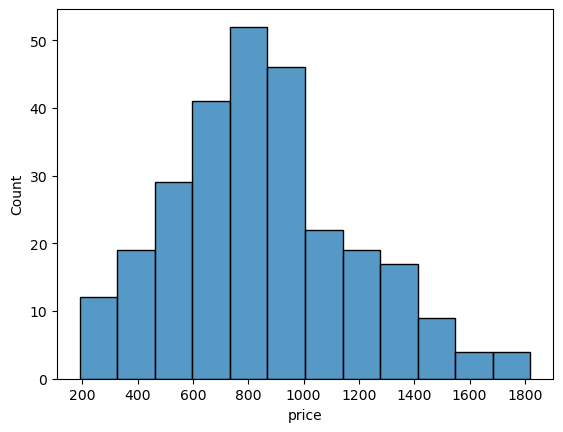

In [29]:
sns.histplot(data = df, x = 'price')

<AxesSubplot:xlabel='price', ylabel='Count'>

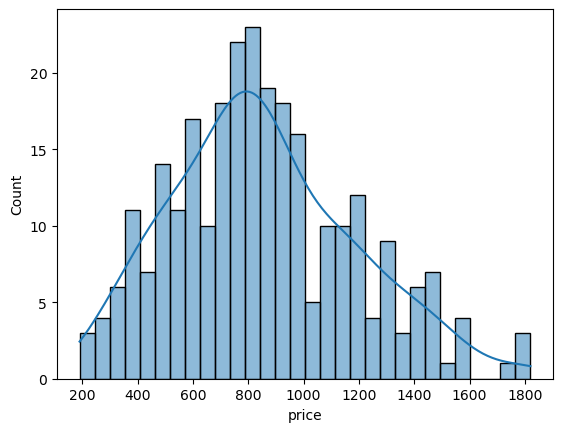

In [30]:
sns.histplot(data = df, x = 'price', bins = 30,  kde = True)

<AxesSubplot:xlabel='price', ylabel='Count'>

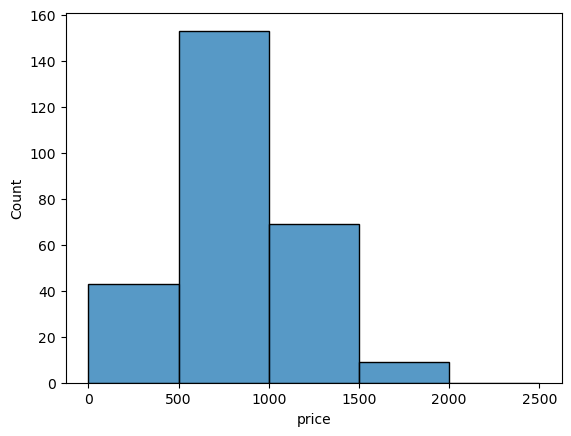

In [31]:
sns.histplot(data = df, x = 'price', bins = [0,500,1000,1500,2000,2500])

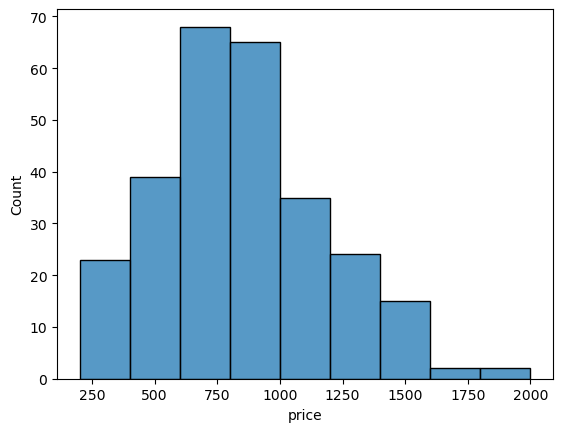

In [32]:
xs =  list(range(200,2100,200))
sns.histplot(data = df, x = 'price', bins = xs);

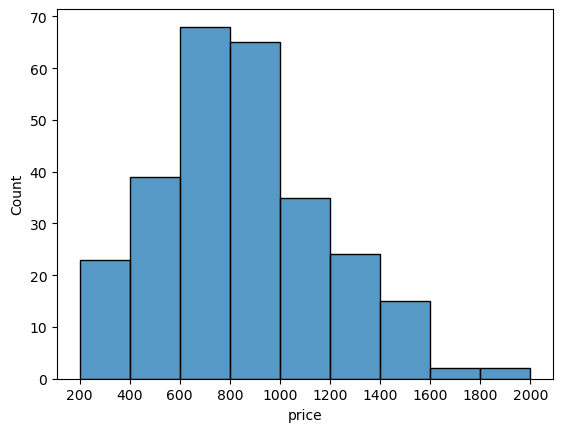

In [33]:
xs =  list(range(200,2100,200))
sns.histplot(data = df, x = 'price', bins = xs)
plt.xticks(xs);

In [34]:
df.describe()

,mileage,price,year,my_car_damage,other_car_damage
count,274.000000,274.000000,274.000000,2.740000e+02,2.740000e+02
mean,77483.222628,853.660584,2013.273723,2.319453e+06,1.807992e+06
std,43015.794453,332.613127,2.589406,3.080107e+06,4.655390e+06
min,2287.000000,190.000000,2006.000000,0.000000e+00,0.000000e+00
25%,47597.500000,620.000000,2011.000000,0.000000e+00,0.000000e+00
50%,71649.000000,805.000000,2014.000000,1.100410e+06,3.986190e+05
75%,103193.750000,1090.000000,2015.000000,3.002840e+06,1.640666e+06
max,310000.000000,1820.000000,2018.000000,1.536732e+07,5.510890e+07


In [38]:
import pingouin as pg
# pip install pingouin

In [39]:
pg.ttest(df.price, 0, confidence = 0.95) # 평균의 95% 신뢰구간

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,42.483582,273,two-sided,2.486212e-122,"[814.1, 893.22]",2.566527,2.773e+118,1.0


In [52]:
print('mileage의 95% 신뢰구간 : ', pg.ttest(df['mileage'], 0, confidence = 0.95)['CI95%'])
print('mileage의 99% 신뢰구간 : ', pg.ttest(df['mileage'], 0, confidence = 0.99)['CI99%'])

mileage의 95% 신뢰구간 :  T-test    [72367.22, 82599.22]
Name: CI95%, dtype: object
mileage의 99% 신뢰구간 :  T-test    [70742.35856441465, 84224.0866910598]
Name: CI99%, dtype: object


In [54]:
pg.ttest(df[df['model'] == 'Avante']['price'], 0, confidence = 0.95).reset_index(drop = True)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
0,33.011035,204,two-sided,9.072793e-84,"[783.64, 883.19]",2.305591,1.149e+80,1.0


In [58]:
print('Avante : ', pg.ttest(df[df['model'] == 'Avante']['price'], 0, confidence = 0.95)['CI95%'])
print('K3 : ', pg.ttest(df[df['model'] == 'K3']['price'], 0, confidence = 0.95)['CI95%'])

Avante :  T-test    [783.64, 883.19]
Name: CI95%, dtype: object
K3 :  T-test    [861.59, 966.03]
Name: CI95%, dtype: object


In [59]:
import scipy
import numpy as np
scipy.stats.bootstrap([df['price']], np.mean)

BootstrapResult(confidence_interval=ConfidenceInterval(low=815.3915900670546, high=893.8596741305391), standard_error=19.962034555934952)

In [63]:
# 통계 이론을 이용해서 구한 평균의 95% 신뢰구간:      814.1, 893.22
# 부트스트랩(시뮬레이션)으로 구한 평균의 95% 신뢰구간: 815.1, 892.5

In [61]:
scipy.stats.bootstrap([df['price']], np.median)
# 부트스트랩을 활용한 중간값의 95% 신뢰구간 구하기

BootstrapResult(confidence_interval=ConfidenceInterval(low=770.0, high=860.0), standard_error=22.580646326530278)

In [62]:
df['price'].median()

805.0

In [64]:
196 * 0.5 / np.sqrt(1000) # 1000명을 조사했을 때 오차범위 %p

3.0990321069650117

In [65]:
196 * 0.5 / np.sqrt(402) # 402명을 조사했을 때 오차범위 %p

4.887795746927401

In [68]:
오차범위 = 1  # 퍼센트 포인트
인원수= (98 / 오차범위)**2
인원수

9604.0

In [223]:
pg.ttest(df.price, 900) # 귀무가설(앖애버릴거야!) 모평균 = 900
# p-val(0.021852) < 유의수즌(0.05) : 부숴버려!

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-2.306144,273,two-sided,0.021852,"[814.1, 893.22]",0.139319,0.917,0.632352


In [71]:
p = 0.021852
유의수준 = 0.05
p < 유의수준

True

In [73]:
hr = pd.read_excel('data/hr.xlsx')
hr.head(2)

,department,job_level,marriage,rating,overtime
0,Sales,Salaried,single,4,14
1,Engineering,Hourly,single,4,8


In [88]:
p_val = pg.ttest(hr['overtime'], 12).loc['T-test','p-val']
p_val

1.5395780953415657e-29

In [89]:
유의수준 = 0.05
p_val < 유의수준

True

In [90]:
# 귀무가설: Avante 와 K3
Avante = df[df['model'] == 'Avante'].price
K3 = df[df['model'] == 'K3'].price
pg.ttest(Avante, K3)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-2.21101,196.691919,two-sided,0.028187,"[-152.11, -8.69]",0.242614,1.482,0.4119


In [91]:
0.028187 < 0.05 # p < 유의수준 -> 귀무가설 기각 -> 평균에는 차이가 있긴 하다

True

In [92]:
# 평균 차이가 신뢰구간 -152.11 ~ -8.69
# 모집단에서는 Avante 평균이 많으면 152먼원, 못해도 8만원은 싸다
# 하여간 Avante 가 K3보다 싸다.

In [93]:
x1 = np.random.random(100)
x2 = np.random.random(100)
pg.ttest(x1, x2)

# 신뢰구간 -0.11 ~ 0 ~ 0.06 
#  => p > 0.05 
#  => 귀무가설 기각X 
#  => 통계적으로 유의한 차이가 없다

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-0.114323,198,two-sided,0.909097,"[-0.09, 0.08]",0.016168,0.155,0.051484


In [96]:
hr.head()

,department,job_level,marriage,rating,overtime
0,Sales,Salaried,single,4,14
1,Engineering,Hourly,single,4,8
2,Engineering,Hourly,single,4,4
3,Engineering,Salaried,married,4,0
4,Engineering,Hourly,married,2,21


In [100]:
## 실습
# hr.xlsx에서 marrige 변수는 미혼(single)과 기혼(married)을 나타냅니다.
# 미혼직원과 기혼직원 사이에 overtime을 독립표본 t검정으로 비교해보세요
pg.ttest(hr[hr['marriage']=='single']['overtime'], hr[hr['marriage']=='married']['overtime'])

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,0.498229,1465.031434,two-sided,0.618398,"[-0.72, 1.21]",0.025978,0.066,0.078781


In [103]:
hi = pd.read_excel('data/hiring.xlsx')
hi.head(2)

,gpa,test,major,hire
0,3.27,45,1,F
1,3.04,43,1,P


In [108]:
# 귀무가설 : 전공자와 비전공자의 차이가 없다.
전공자 = hi[hi['major'] == 1]['test']
비전공자 = hi[hi['major'] == 0]['test']
pg.ttest(전공자,비전공자)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-0.507503,998,two-sided,0.611914,"[-3.24, 1.91]",0.032097,0.08,0.079932


In [109]:
cp = pd.read_excel('data/couple.xlsx')
pg.ttest(cp['husband'], cp['wife'], paired=True)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-2.986887,19,two-sided,0.007578,"[-13.61, -2.39]",0.84451,6.46,0.947372


In [110]:
pg.homoscedasticity(dv='price', group='model', data=df)

,W,pval,equal_var
levene,22.092071,0.000004,False


In [111]:
pg.welch_anova(dv='price', between='model', data=df)

,Source,ddof1,ddof2,F,p-unc,np2
0,model,1,196.691919,4.888567,0.028187,0.011048


In [113]:
pg.ttest(Avante, K3)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-2.21101,196.691919,two-sided,0.028187,"[-152.11, -8.69]",0.242614,1.482,0.4119


In [115]:
# 집단이 2개일 때는 t-검정 p와 분산분석의 p가 같음
# 분산분석을 해도 되지만,  굳이 할 필요가 없다.

In [118]:
hr.head(3)

,department,job_level,marriage,rating,overtime
0,Sales,Salaried,single,4,14
1,Engineering,Hourly,single,4,8
2,Engineering,Hourly,single,4,4


In [121]:
hr['job_level'].unique()

array(['Salaried', 'Hourly', 'Manager'], dtype=object)

In [122]:
pg.homoscedasticity(dv='rating', group='job_level', data=hr)
# 등분산성 검정: 귀무가설 기각 -> 분산이 다름

,W,pval,equal_var
levene,6.138372,0.002214,False


In [123]:
pg.welch_anova(dv='rating', between='job_level', data=hr)
# 이분산성을 보정하기 위해 웰치의 분산분석
# 귀무가설 기각 -> 결론: 어떤 집단의 평균이 다름

,Source,ddof1,ddof2,F,p-unc,np2
0,job_level,2,273.23336,198.666881,5.394990e-54,0.183206


In [124]:
pg.pairwise_gameshowell(dv='rating', between='job_level', data=hr)
# 어느 집단과 어느 집단이 다른지 알기 위해 사후 분석
# 분산이 다르므로 Games-Howel 검정
# 분석 결과: 모든 집단이 서로 다른 것을 확인

,A,B,mean(A),mean(B),diff,se,T,df,pval,hedges
0,Hourly,Manager,2.566891,4.142857,-1.575966,0.086197,-18.283232,136.073046,0.0,-1.615057
1,Hourly,Salaried,2.566891,3.245399,-0.678508,0.060834,-11.153506,563.974875,0.0,-0.692385
2,Manager,Salaried,4.142857,3.245399,0.897458,0.096168,9.332215,199.708018,0.0,0.973631


In [128]:
census = pd.read_excel('data/census.xlsx')
census.head(3)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K


In [129]:
census['race'].value_counts()

White                 27816
Black                  3124
Asian-Pac-Islander     1039
Amer-Indian-Eskimo      311
Other                   271
Name: race, dtype: int64

In [134]:
# 등분산성 검정
pg.homoscedasticity(dv='education_num', group='race', data=census)

,W,pval,equal_var
levene,45.022712,9.087050e-38,False


In [137]:
# 분산 분석: 집단 간 분산 / 집단 내 분산
pg.welch_anova(dv='education_num', between='race', data=census)
# 집단 내 분산이 같은 것처럼 보정해줌
# F가 약 99임 >> 집단 내 분산 보다 집단 간 분산이 크다 즉, 집단 간의 차이가 크다는 의미
# 에타제곱 >> 0.01 이므로 인종에 따른 차이는 작다는 것을 의미.

,Source,ddof1,ddof2,F,p-unc,np2
0,race,4,1002.461498,98.900787,5.587944e-71,0.012023


In [131]:
pg.pairwise_gameshowell(dv='education_num', between='race', data=census)

,A,B,mean(A),mean(B),diff,se,T,df,pval,hedges
0,Amer-Indian-Eskimo,Asian-Pac-Islander,9.311897,10.960539,-1.648642,0.157391,-10.474821,609.952107,6.716849e-14,-0.609240
1,Amer-Indian-Eskimo,Black,9.311897,9.486236,-0.174338,0.137309,-1.269676,373.702957,7.100158e-01,-0.075815
2,Amer-Indian-Eskimo,Other,9.311897,8.841328,0.470569,0.235732,1.996198,481.494003,2.693623e-01,0.169382
3,Amer-Indian-Eskimo,White,9.311897,10.135246,-0.823349,0.131913,-6.241587,318.638097,1.377793e-08,-0.320662
4,Asian-Pac-Islander,Black,10.960539,9.486236,1.474303,0.096429,15.289039,1525.407513,0.000000e+00,0.605057
5,Asian-Pac-Islander,Other,10.960539,8.841328,2.119211,0.214510,9.879323,383.653706,1.132427e-13,0.729836
6,Asian-Pac-Islander,White,10.960539,10.135246,0.825293,0.088576,9.317304,1103.777621,0.000000e+00,0.319950
7,Black,Other,9.486236,8.841328,0.644907,0.200241,3.220658,294.238881,1.230253e-02,0.270338
8,Black,White,9.486236,10.135246,-0.649010,0.043906,-14.781777,4053.342645,2.768563e-12,-0.255095
9,Other,White,8.841328,10.135246,-1.293917,0.196580,-6.582146,273.349624,2.357437e-09,-0.502010


,W,pval,equal_var
levene,0.720903,0.396873,True


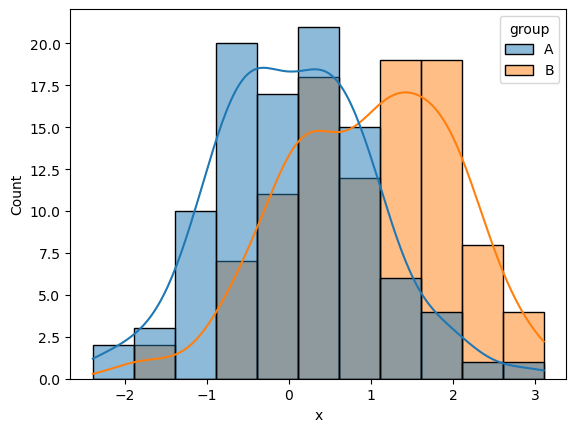

In [138]:
from scipy.stats import norm
import seaborn as sns

# 데이터 만들기
x1 = norm.rvs(loc=0.0, scale=1.0, size=100)
x2 = norm.rvs(loc=1.0, scale=1.0, size=100)
d = pd.concat([pd.DataFrame({'x': x1, 'group': 'A'}), pd.DataFrame({'x': x2, 'group': 'B'})]).reset_index()

# 히스토그램
sns.histplot(x='x', hue='group', data=d, kde=True)

# 등분산성 검정
pg.homoscedasticity(dv='x', group='group', data=d)

In [142]:
x1 = norm.rvs(loc=0.0, scale=1.0, size=100)  # 표준편차가 1.0
x2 = norm.rvs(loc=1.0, scale=2.0, size=100)  # 표준편차가 2.0

,W,pval,equal_var
levene,0.720903,0.396873,True


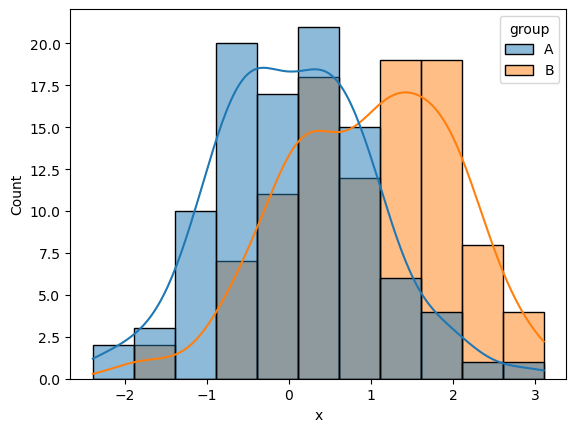

In [143]:
# 히스토그램
sns.histplot(x='x', hue='group', data=d, kde=True)  

# 등분산성 검정
pg.homoscedasticity(dv='x', group='group', data=d)  

In [140]:
from scipy.stats import chisquare

# 50명에게 브랜드 선호도를 물었는데 A 브랜드를 선호하는 사람이 31명, B를 선호하는 사람이 19명
# 귀무가설: 두 브랜드에 차이가 없을 것이다 25:25일거다
chisquare([31, 19], [25, 25])  # p > 0.05 => 결론을 유보

Power_divergenceResult(statistic=2.88, pvalue=0.08968602177036435)

In [141]:
# 100명에게 브랜드 선호도를 물었는데 A 브랜드를 선호하는 사람이 62명, B를 선호하는 사람이 38명
# 귀무가설: 두 브랜드에 차이가 없을 것이다 50:50일거다
chisquare([62, 38], [50, 50])  # p < 0.05 => 귀무가설 기각 => 브랜드 선호도에 차이가 있다

Power_divergenceResult(statistic=5.76, pvalue=0.01639507184919225)

In [162]:
# hr.set_index('marriage')
# hr.set_axis('department')
hr.pivot_table(index = 'marriage', columns = 'department', aggfunc = 'size')

department,Engineering,Finance,Sales
marriage,,,
married,462,36,209
single,499,27,237


In [167]:
expected, observed, stats = pg.chi2_independence(x = 'department',y = 'marriage', data = hr)
stats
# 귀무가설: 부서별 결혼 비율에 차이가 없다
# p > 0.05 => 결론을 유보

,test,lambda,chi2,dof,pval,cramer,power
0,pearson,1.000000,2.338180,2.0,0.310650,0.039882,0.257948
1,cressie-read,0.666667,2.337586,2.0,0.310742,0.039877,0.257891
2,log-likelihood,0.000000,2.340188,2.0,0.310338,0.039899,0.258141
3,freeman-tukey,-0.500000,2.345475,2.0,0.309518,0.039944,0.258649
4,mod-log-likelihood,-1.000000,2.353653,2.0,0.308255,0.040014,0.259435
5,neyman,-2.000000,2.378838,2.0,0.304398,0.040228,0.261856


In [168]:
expected

marriage,married,single
department,,
Engineering,462.195238,498.804762
Finance,30.300000,32.700000
Sales,214.504762,231.495238


In [ ]:
# conda install -c conda-forge statsmodels

In [169]:
from statsmodels.stats.contingency_tables import mcnemar
table = [[40, 10], [20, 30]]
m = mcnemar(table, exact=False, correction=False)
print(m)
# 귀무가설: 전후에 차이가 없다
# 결과 p > 0.05 귀무가설 기각 못함
# 결론을 유보

pvalue      0.06788915486182893
statistic   3.3333333333333335


* 카이제곱, 맥니마 : 비율에 대해 분석
* t-검정, 분산 분석 등 : 평균이 다른지 분석

In [201]:
liar = pd.read_excel('data/liar.xlsx')
liar.head(3)
# Creativity : 창의성 | 연속변수
# Position : 등급 | 서열-순서가 있는 범주형
# Novice : 초보자 | 0 : 처음 나온 사람, 1 : 경험이 있는 사람

,Creativity,Position,Novice
0,53,1,0
1,36,3,1
2,31,4,0


In [198]:
liar.Position.unique()

array([1, 3, 4, 2, 5, 6], dtype=int64)

In [200]:
# Position 별로 Creativity의 평균이 다른가?
# 여러 집단의 평균이 다른가? >> *분산 분석*!!
# 분산 분석 >> 등분산 검정
pg.homoscedasticity(dv='Creativity', group='Position', data=liar)

,W,pval,equal_var
levene,1.671988,0.15468,True


In [194]:
# 등분산이므로 등분산 분산 분석 사용
pg.anova(dv='Creativity', between='Position', data=liar)
# p < 0.05 : 귀무가설 기각 >> 어떤 Position의 평균이 다르다.

,Source,ddof1,ddof2,F,p-unc,np2
0,Position,5,62,4.808166,0.000887,0.279412


In [199]:
pg.pairwise_tukey(dv='Creativity', between='Position', data=liar)

,A,B,mean(A),mean(B),diff,se,T,p-tukey,hedges
0,1,2,42.793103,42.200000,0.593103,2.278212,0.260337,0.999829,0.080492
1,1,3,42.793103,34.454545,8.338558,2.536571,3.287335,0.019798,1.211460
2,1,4,42.793103,32.750000,10.043103,2.860679,3.510741,0.010397,1.362572
3,1,5,42.793103,36.000000,6.793103,4.344379,1.563654,0.625067,0.808835
4,1,6,42.793103,48.000000,-5.206897,5.236959,-0.994260,0.918073,-0.696619
5,2,3,42.200000,34.454545,7.745455,2.843525,2.723892,0.084853,1.245019
6,2,4,42.200000,32.750000,9.450000,3.136069,3.013326,0.041506,1.345824
7,2,5,42.200000,36.000000,6.200000,4.530460,1.368514,0.745355,0.695762
8,2,6,42.200000,48.000000,-5.800000,5.392326,-1.075603,0.889197,-0.818591
9,3,4,34.454545,32.750000,1.704545,3.328494,0.512107,0.995521,0.302591


In [212]:
# Novice와 아닌 사람 사이에 Creativity가 다른가?
# 두 집단 사이의 평균이 다른가? >> 독립표본 t-검점
# 독립표본 t-검정
초보자 = liar[liar['Novice'] == 1]['Creativity']
숙련자 = liar[liar['Novice'] == 0]['Creativity']
pg.ttest(숙련자, 초보자)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,2.188868,63.88066,two-sided,0.032268,"[0.37, 8.05]",0.533061,1.856,0.581197


In [209]:
# Novice와 아닌 사람 사이에 Position이 다른가?
# 맨휘트니 U 검정 및 카이제곱 독립성 검정.
# 1. 카이제곱 독립성 검정
expected, observed, stats = pg.chi2_independence(x = 'Novice',y = 'Position', data = liar)
stats

C:\Users\juku\anaconda3\lib\site-packages\pingouin\contingency.py:150: UserWarning: Low count on observed frequencies.
  warnings.warn("Low count on {} frequencies.".format(name))
C:\Users\juku\anaconda3\lib\site-packages\pingouin\contingency.py:150: UserWarning: Low count on expected frequencies.
  warnings.warn("Low count on {} frequencies.".format(name))


,test,lambda,chi2,dof,pval,cramer,power
0,pearson,1.000000,1.470976,5.0,0.916395,0.147078,0.125049
1,cressie-read,0.666667,1.474931,5.0,0.915945,0.147276,0.125280
2,log-likelihood,0.000000,1.487222,5.0,0.914540,0.147888,0.125997
3,freeman-tukey,-0.500000,1.500421,5.0,0.913021,0.148543,0.126769
4,mod-log-likelihood,-1.000000,1.517203,5.0,0.911076,0.149371,0.127752
5,neyman,-2.000000,1.562302,5.0,0.905770,0.151575,0.130406


In [210]:
# 2. 맨휘트니 U 검정
pg.mwu(liar[liar['Novice']==0]['Position'], liar[liar['Novice']==1]['Position'])

,U-val,alternative,p-val,RBC,CLES
MWU,508.5,two-sided,0.377171,0.119481,0.44026


* 상관분석에서의 귀무가설 : 모집단에서 상관계수 = 0 >> 상관이 없다
* 기각 >> 상관이 있긴 하다!

In [213]:
import pingouin as pg
import pandas as pd
df = pd.read_excel('data/car.xlsx')
df.head()

,mileage,model,price,year,my_car_damage,other_car_damage
0,63608,K3,970,2017,0,564596
1,69336,K3,1130,2015,1839700,1140150
2,36000,K3,1380,2016,446520,2244910
3,19029,K3,1390,2017,889000,4196110
4,97090,K3,760,2015,2339137,2029570


<AxesSubplot:xlabel='mileage', ylabel='price'>

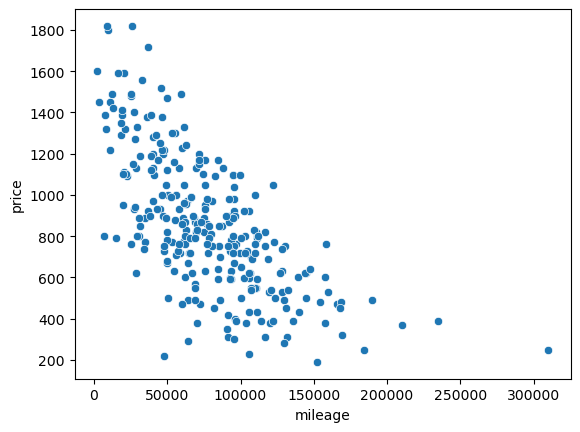

In [214]:
import seaborn as sns
sns.scatterplot(x='mileage', y='price', data=df)

In [216]:
pg.corr(df['mileage'], df['price']) # 피어슨 상관계수: -0.67616

,n,r,CI95%,p-val,BF10,power
pearson,274,-0.67616,"[-0.74, -0.61]",5.809388e-38,5.069e+34,1.0


In [218]:
## 실습 
# 연식(year) 과 가격(price) 상관관계

In [219]:
pg.corr(df['year'], df['price'])

,n,r,CI95%,p-val,BF10,power
pearson,274,0.828908,"[0.79, 0.86]",1.388002e-70,1.004e+67,1.0


<AxesSubplot:xlabel='year', ylabel='price'>

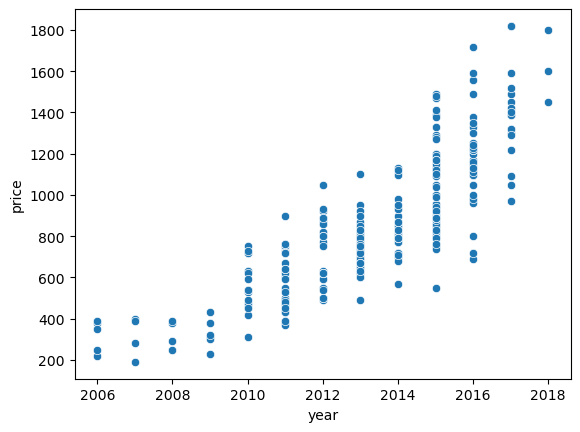

In [220]:
sns.scatterplot(data = df, x = df['year'], y = df['price'])

In [224]:
pg.corr(df.mileage, df.other_car_damage)
#귀무가설: 상관 없다 -> 기각 못함 -> 결론 유보
#신뢰구간 -0.1  0  +0.1

,n,r,CI95%,p-val,BF10,power
pearson,274,0.00795,"[-0.11, 0.13]",0.895775,0.076,0.051912


In [226]:
df.corr() # 한번에 전부 비교 >>  상관행렬 !

,mileage,price,year,my_car_damage,other_car_damage
mileage,1.000000,-0.676160,-0.569850,0.192549,0.007950
price,-0.676160,1.000000,0.828908,-0.418789,-0.245997
year,-0.569850,0.828908,1.000000,-0.318469,-0.204411
my_car_damage,0.192549,-0.418789,-0.318469,1.000000,0.243626
other_car_damage,0.007950,-0.245997,-0.204411,0.243626,1.000000


* 상관행렬을 볼 때 조심할 것!
* 상관행렬은 사실상 상관분석을 아~주 많이 한 것 => 다중비교 문제!
* 
* 상상 : 데이터 분석을 많이 하면 좋은 거다
* 통계적 진실 : 데이터 분석을 많이 하면 반드시 이상한 결과가 나온다
* 
* A : 제가 밤을 새서 데이터 분석을 했습니다 !
* B (상식인) : 와 훌륭하네요 !
* C (통계인) : 미친 거 아니야? 큰일 낼 사람이네 ...

In [251]:
asset = pd.read_excel('data/asset.xlsx')
asset .head()

,Date,GLD,SPX
0,44958,1850.6,4147.60
1,44927,1929.5,4076.60
2,44896,1826.2,3839.50
3,44866,1759.9,4080.11
4,44835,1640.7,3871.98


In [252]:
pg.corr(asset['GLD'], asset['SPX'])

,n,r,CI95%,p-val,BF10,power
pearson,240,0.686535,"[0.61, 0.75]",8.580001e-35,3.763e+31,1.0


<AxesSubplot:xlabel='GLD', ylabel='SPX'>

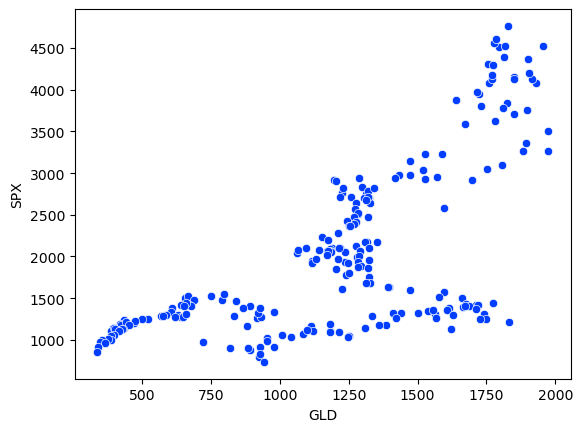

In [253]:
sns.set_palette('bright')
sns.scatterplot(data = asset, x = asset['GLD'], y = asset['SPX'])

In [254]:
 asset['GLD'].diff() # 차분(이후 기간 - 이전 기간)

0        NaN
1       78.9
2     -103.3
3      -66.3
4     -119.2
       ...  
235    -21.3
236     -8.3
237     18.9
238    -25.8
239     -2.9
Name: GLD, Length: 240, dtype: float64

In [255]:
asset['GLD'].pct_change() # 차분 / (이전 기간) = 비율 변화

0           NaN
1      0.042635
2     -0.053537
3     -0.036305
4     -0.067731
         ...   
235   -0.056604
236   -0.023380
237    0.054514
238   -0.070569
239   -0.008534
Name: GLD, Length: 240, dtype: float64

<AxesSubplot:xlabel='Date', ylabel='GLD'>

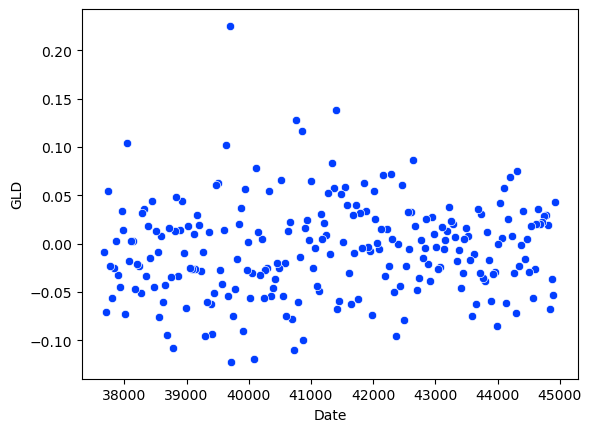

In [256]:
sns.scatterplot(x = asset['Date'], y = asset['GLD'].pct_change()) # 시간에 따른 금 수익률

<AxesSubplot:xlabel='Date', ylabel='SPX'>

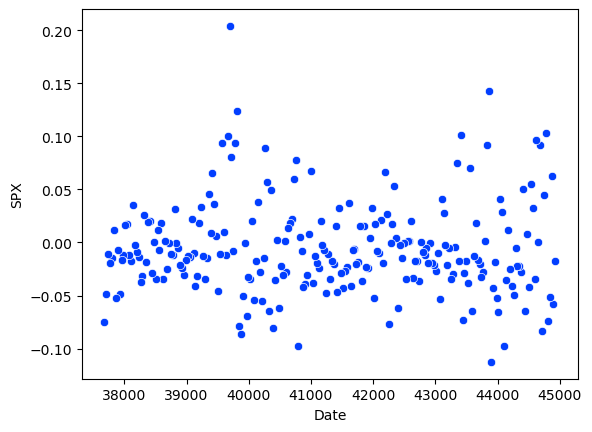

In [257]:
sns.scatterplot(x=asset.Date, y=asset.SPX.pct_change())  # 시간에 따른 주식 수익률

<AxesSubplot:xlabel='GLD', ylabel='SPX'>

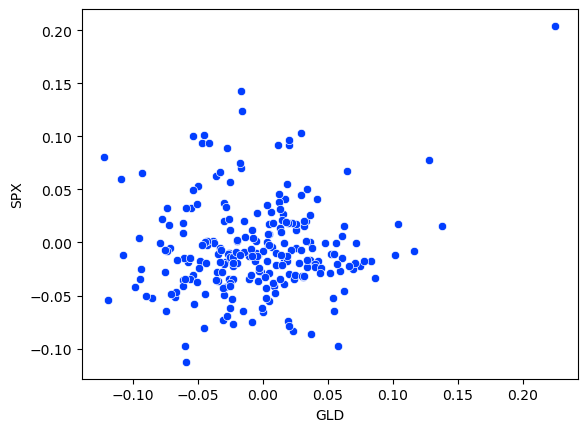

In [258]:
# 금과 주식의 수익률 산점도
sns.scatterplot(x=asset.GLD.pct_change(),  y=asset.SPX.pct_change())

In [259]:
pg.corr(asset.GLD.pct_change(), asset.SPX.pct_change())
# 귀무가설: 주가와 금의 수익률은 상관이 없다
# 귀무가설 기각 X
# 결론을 유보
# 투자 관점: 주식과 금은 같은 포트폴리오에 넣을만하다(실제로 넣으라는 것은 아님)

,n,r,CI95%,p-val,BF10,power
pearson,239,0.10955,"[-0.02, 0.23]",0.091065,0.335,0.394753


In [260]:
pg.corr(df['mileage'], df['price']) # 피어슨 상관계수: -0.67616

,n,r,CI95%,p-val,BF10,power
pearson,274,-0.67616,"[-0.74, -0.61]",5.809388e-38,5.069e+34,1.0


In [261]:
pg.corr(df['mileage'], df['price'], method = 'spearman') # 피어슨 상관계수: -0.67616

,n,r,CI95%,p-val,power
spearman,274,-0.692834,"[-0.75, -0.63]",1.645376e-40,1.0


In [262]:
pg.corr(df['mileage'], df['price'], method = 'kendall') # 피어슨 상관계수: -0.67616
# 

,n,r,CI95%,p-val,power
kendall,274,-0.507709,"[-0.59, -0.41]",1.119123e-35,1.0


* 한국주식 vs 미국주식

In [264]:
asset_2 = pd.read_excel('data/asset2.xlsx')

,n,r,CI95%,p-val,BF10,power
pearson,239,0.696451,"[0.62, 0.76]",5.177694e-36,6.016e+32,1.0


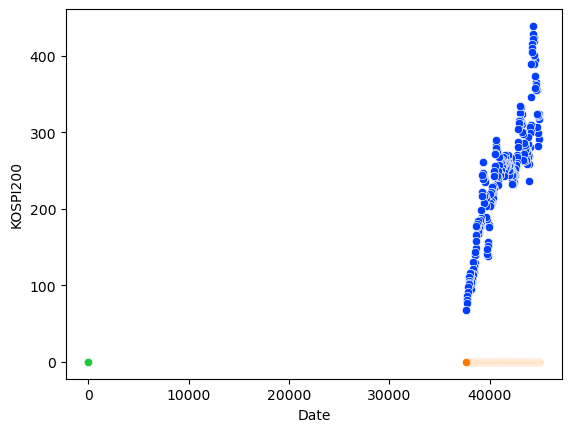

In [265]:
sns.scatterplot(x=asset_2.Date, y=asset_2.KOSPI200)  # 시간에 따른 한국 주가
sns.scatterplot(x=asset_2.Date, y=asset_2.KOSPI200.pct_change())  # 수익률

# 한국과 미국의 주식 수익률 산점도
sns.scatterplot(x=asset_2.KOSPI200.pct_change(),  y=asset_2.SPX.pct_change())

pg.corr(asset_2.KOSPI200.pct_change(), asset_2.SPX.pct_change())  # 한국, 미국 주식 수익률 상관계수
# 귀무가설: 상관없다 -> 기각 -> 상관있다
# 한국 주식과 미국 주식을 함께 투자하는 것은 위험 분산이 잘 안됨

In [308]:
from statsmodels.formula.api import ols # OLS : 최소제곱법
# 회귀분석
m = ols('price ~ mileage', df).fit()
m.summary()
# Intercept(절편) 1258.7668  주행거리 0Km일 때 1258만원 
# mileage (기울기)  -0.0052  1만Km마다 52만원 꼴로 가격이 떨어짐
# 잔차 분산은 작을 수록 좋음
# R-squared (R 제곱) : 회귀 분석에서 예측의 정확성을 알기 쉽게 판단할 수 있게 만든 지표 0 ~ !
# R 제곱 = 0 : 분석결과가 y 예측에 도움이 안 됨
# R 제곱 = 1 : Y를 완벽하게 정확히 예측할 수 있음
# 결과적으로 의미하는 바가 R제곱과 에타제곱이 같음 !!
# 상관계수**2 = R제곱 = 에타제곱

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.457
Model:                            OLS   Adj. R-squared:                  0.455
Method:                 Least Squares   F-statistic:                     229.1
Date:                Thu, 16 Feb 2023   Prob (F-statistic):           5.81e-38
Time:                        15:28:17   Log-Likelihood:                -1895.7
No. Observations:                 274   AIC:                             3795.
Df Residuals:                     272   BIC:                             3803.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1258.7668     30.599     41.137      0.000    1198.526    1319.008
mileage       -0.0052      0.000    -15.136      0.000      -0.006      -0.005
==============================================================================
Omnibus:                        0.258   Durbin-Watson:                   1.101
Prob(Omnibus):                  0.879   Jarque-Bera (JB):                0.108
Skew:                           0.032   Prob(JB):                        0.947
Kurtosis:                       3.074   Cond. No.                     1.83e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.83e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<AxesSubplot:xlabel='mileage', ylabel='price'>

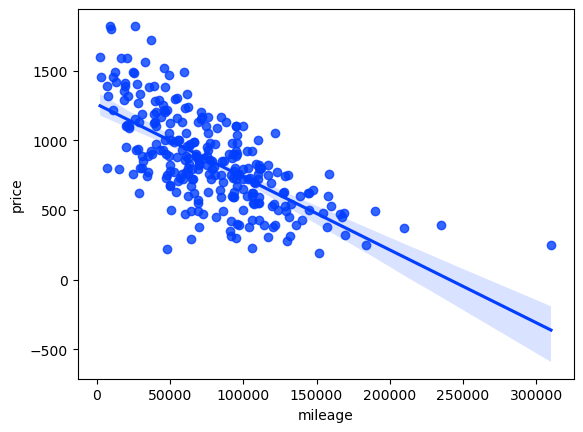

In [309]:
# %matplotlib inline
sns.regplot(x='mileage', y='price', data=df) # 주행거리와 가격의 관계 시각화

In [310]:
# 가격 에측
new_df = pd.DataFrame({'mileage': [10000, 20000]})
new_df

,mileage
0,10000
1,20000


In [311]:
m.predict(new_df)

0    1206.483684
1    1154.200600
dtype: float64

In [313]:
## 실습
# 속도 (speed) 독립변수 
# 제동거리 (dist) 종속변수
speed = pd.read_excel('data/speed.xlsx')
speed.head()

,speed,dist
0,4,2
1,4,10
2,7,4
3,7,22
4,8,16


In [314]:
s = ols('dist ~ speed', speed).fit()
s.summary()
# 절편(intercept) : -17.5791
# 기울기(speed) : 3.9324 : t값 >> 귀무가설 = 기울기가 0 이다.
# R제곱 : 0.651

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   dist   R-squared:                       0.651
Model:                            OLS   Adj. R-squared:                  0.644
Method:                 Least Squares   F-statistic:                     89.57
Date:                Thu, 16 Feb 2023   Prob (F-statistic):           1.49e-12
Time:                        15:38:04   Log-Likelihood:                -206.58
No. Observations:                  50   AIC:                             417.2
Df Residuals:                      48   BIC:                             421.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -17.5791      6.758     -2.601      0.012     -31.168      -3.990
speed          3.9324      0.416      9.464      0.000       3.097       4.768
==============================================================================
Omnibus:                        8.975   Durbin-Watson:                   1.676
Prob(Omnibus):                  0.011   Jarque-Bera (JB):                8.189
Skew:                           0.885   Prob(JB):                       0.0167
Kurtosis:                       3.893   Cond. No.                         50.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<AxesSubplot:xlabel='speed', ylabel='dist'>

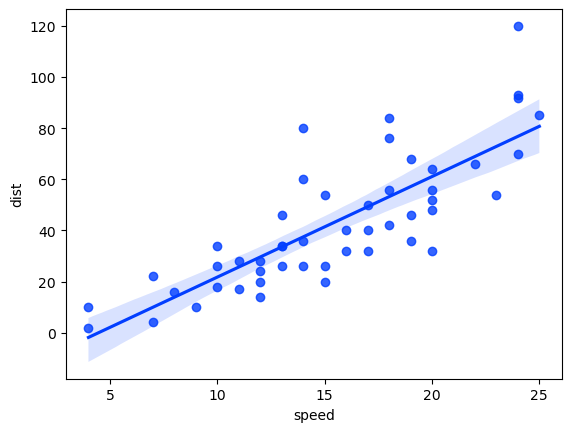

In [304]:
sns.regplot(x = 'speed', y = 'dist', data = speed)

In [305]:
predict_speed = pd.DataFrame({'speed' : [10]})
# new_df = pd.DataFrame({'mileage': [10000, 20000]})
predict_speed

,speed
0,10


In [307]:
s.predict(predict_speed)

0    21.744993
dtype: float64

In [316]:
df.head()

,mileage,model,price,year,my_car_damage,other_car_damage
0,63608,K3,970,2017,0,564596
1,69336,K3,1130,2015,1839700,1140150
2,36000,K3,1380,2016,446520,2244910
3,19029,K3,1390,2017,889000,4196110
4,97090,K3,760,2015,2339137,2029570


In [315]:
m = ols('price ~ mileage + year', df).fit()
m.summary()
# price = a            +  b * mileage + c * year
#      -1.688e+5      -0.0023        +84.3822

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.749
Model:                            OLS   Adj. R-squared:                  0.747
Method:                 Least Squares   F-statistic:                     403.5
Date:                Thu, 16 Feb 2023   Prob (F-statistic):           5.62e-82
Time:                        16:14:25   Log-Likelihood:                -1790.2
No. Observations:                 274   AIC:                             3586.
Df Residuals:                     271   BIC:                             3597.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.688e+05   9597.865    -17.592      0.000   -1.88e+05    -1.5e+05
mileage       -0.0023      0.000     -8.143      0.000      -0.003      -0.002
year          84.3822      4.761     17.724      0.000      75.009      93.755
==============================================================================
Omnibus:                       11.272   Durbin-Watson:                   1.598
Prob(Omnibus):                  0.004   Jarque-Bera (JB):               11.786
Skew:                           0.435   Prob(JB):                      0.00276
Kurtosis:                       3.523   Cond. No.                     8.41e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.41e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [323]:
iqsize = pd.read_excel('data/iqsize.xlsx')
iqsize.head()

,PIQ,Brain,Height,Weight
0,124,81.69,64.5,118
1,150,103.84,73.3,143
2,128,96.54,68.8,172
3,134,95.15,65.0,147
4,110,92.88,69.0,146


In [328]:
iq_1 = ols('PIQ ~ Height + Weight', iqsize).fit()
iq.summary()
# 키 p =  0.433 > 0.05 : 귀무가설(기울기 = 0) 기각 X

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    PIQ   R-squared:                       0.018
Model:                            OLS   Adj. R-squared:                 -0.038
Method:                 Least Squares   F-statistic:                    0.3144
Date:                Thu, 16 Feb 2023   Prob (F-statistic):              0.732
Time:                        17:32:45   Log-Likelihood:                -171.55
No. Observations:                  38   AIC:                             349.1
Df Residuals:                      35   BIC:                             354.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    164.0402     71.316      2.300      0.028      19.260     308.820
Height        -1.0519      1.327     -0.793      0.433      -3.745       1.641
Weight         0.1276      0.226      0.565      0.575      -0.331       0.586
==============================================================================
Omnibus:                        6.646   Durbin-Watson:                   1.611
Prob(Omnibus):                  0.036   Jarque-Bera (JB):                2.149
Skew:                          -0.057   Prob(JB):                        0.341
Kurtosis:                       1.841   Cond. No.                     3.19e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.19e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [327]:
iq_2 = ols('PIQ ~ Height + Weight + Brain', iqsize).fit()
iq_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    PIQ   R-squared:                       0.295
Model:                            OLS   Adj. R-squared:                  0.233
Method:                 Least Squares   F-statistic:                     4.741
Date:                Thu, 16 Feb 2023   Prob (F-statistic):            0.00722
Time:                        17:07:02   Log-Likelihood:                -165.25
No. Observations:                  38   AIC:                             338.5
Df Residuals:                      34   BIC:                             345.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    111.3536     62.971      1.768      0.086     -16.619     239.326
Height        -2.7319      1.229     -2.222      0.033      -5.230      -0.233
Weight         0.0006      0.197      0.003      0.998      -0.400       0.401
Brain          2.0604      0.563      3.657      0.001       0.915       3.205
==============================================================================
Omnibus:                        1.379   Durbin-Watson:                   1.827
Prob(Omnibus):                  0.502   Jarque-Bera (JB):                1.088
Skew:                           0.409   Prob(JB):                        0.580
Kurtosis:                       2.859   Cond. No.                     3.73e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.73e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""